In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv('data/train.csv',index_col=0)
data

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [26]:
store1_beauty = data[data.family == 'BEAUTY'][data.store_nbr==1]
dataset = store1_beauty.drop(['family','store_nbr'],axis=1)
dataset

C:\Users\zulno\AppData\Local\Temp\ipykernel_11196\2727169073.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  store1_beauty = data[data.family == 'BEAUTY'][data.store_nbr==1]


,date,sales,onpromotion
id,,,
2,2013-01-01,0.0,0
1784,2013-01-02,2.0,0
3566,2013-01-03,0.0,0
5348,2013-01-04,3.0,0
7130,2013-01-05,3.0,0
...,...,...,...
2991980,2017-08-11,1.0,1
2993762,2017-08-12,3.0,1
2995544,2017-08-13,1.0,0


In [32]:
data_range = pd.date_range('2013-01-01',periods=len(dataset),freq='D')
data_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-05',
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11'],
              dtype='datetime64[ns]', length=1684, freq='D')

In [34]:
time_series = pd.Series(dataset.sales.values,index=data_range)
time_series

2013-01-01    0.0
2013-01-02    2.0
2013-01-03    0.0
2013-01-04    3.0
2013-01-05    3.0
             ... 
2017-08-07    1.0
2017-08-08    3.0
2017-08-09    1.0
2017-08-10    6.0
2017-08-11    4.0
Freq: D, Length: 1684, dtype: float64

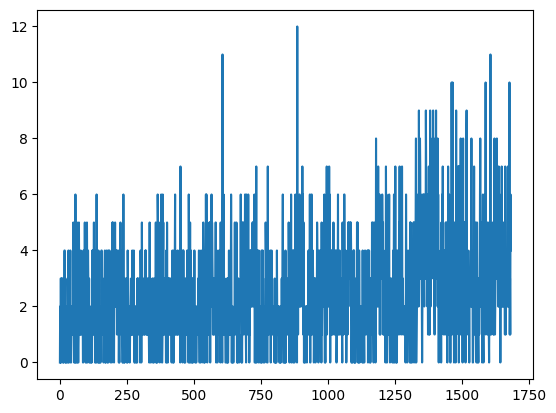

In [51]:
plt.Figure()
plt.plot(time_series.values)
plt.show()

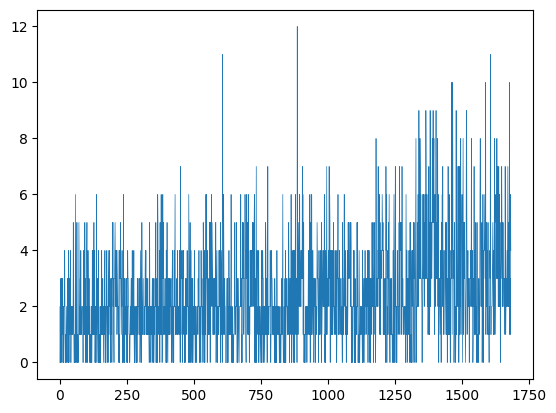

In [57]:
plt.plot(time_series.values,linewidth=.5)
plt.show()

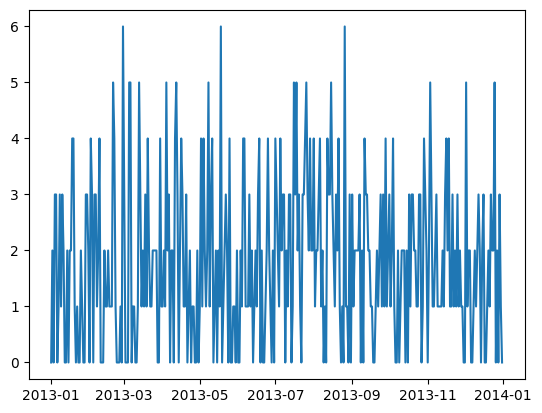

In [64]:
fig = plt.Figure((10,1))
sns.lineplot(time_series[:365])
plt.show()

In [72]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict,month_plot,quarter_plot,seasonal_plot
plots = [plot_acf,plot_pacf,plot_predict,month_plot,quarter_plot,seasonal_plot]

C:\Users\zulno\Anaconda3\envs\first_pytorch_solution\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


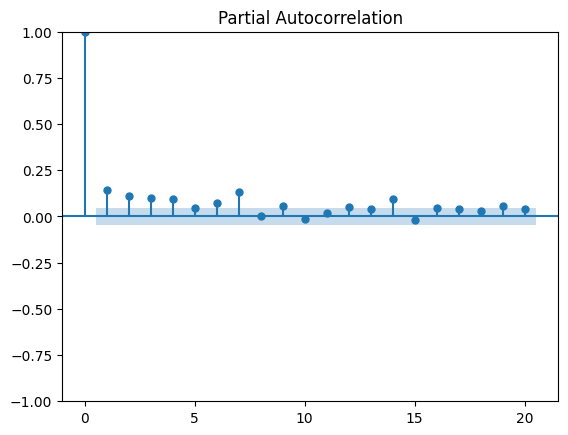

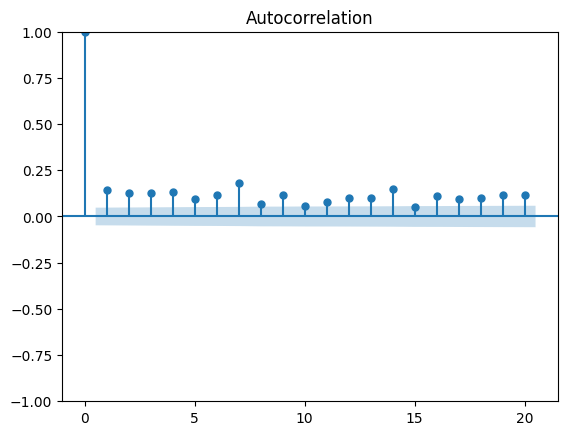

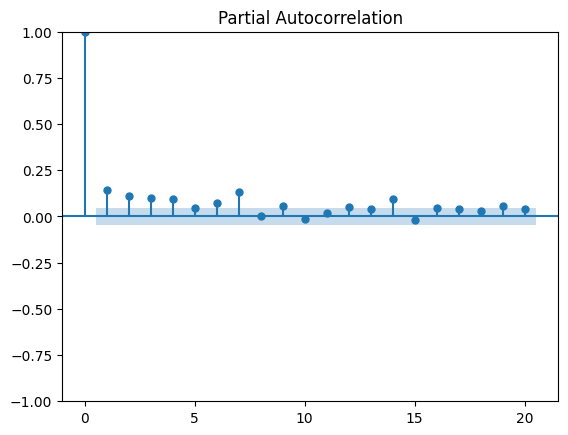

In [96]:
i = 20
plots[0](time_series,lags=i)
plots[1](time_series,lags=i)


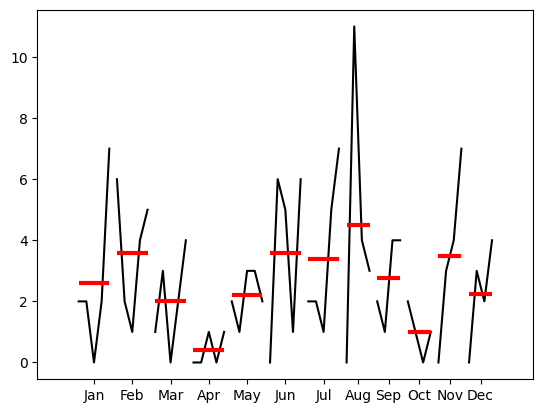

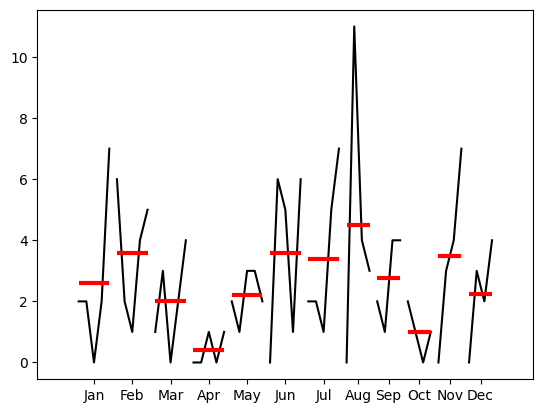

In [81]:
month_plot(time_series.asfreq('M',how='mean'))

TypeError: cannot unpack non-iterable float object

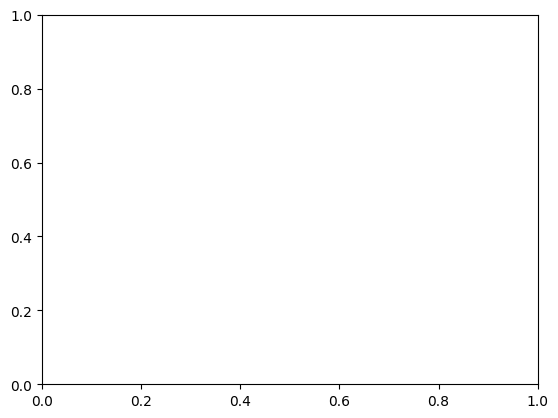

In [88]:
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(time_series)
df_test

(-4.213618150605615,
 0.000624785720456641,
 25,
 1658,
 {'1%': -3.434300212992577,
  '5%': -2.863284793874921,
  '10%': -2.567698886736967},
 6699.534049730701)